## Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# load data
df_r = pd.read_csv("./data/winequality-red.csv", sep=';')
df_w = pd.read_csv("./data/winequality-white.csv", sep=';')
data = pd.concat([df_r, df_w], ignore_index=True)

# selecting features about acidity
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH']
# separating features and target
x_values = data[features].values

# mapping quality to low, medium, high
def map_quality(quality):
    """
    Maps a numerical wine quality score to a categorical label.

    Parameters:
    - quality: int or float, the wine quality score (typically from 0 to 10)

    Returns:
    - A string label: 'low', 'medium', or 'high', based on the quality score
    """
    if quality <= 4:
        return 'low'
    elif quality <= 7:
        return 'medium'
    else:
        return 'high'

data['quality'] = data['quality'].apply(map_quality)
y_values = data['quality'].values  # target (quality)

In [ ]:
# SVD plot function keeping label values on the points 

def plot_svd_projection(x_norm, x_values, y_values, fuzzy_membership, norm, title):
    # Perform SVD on the normalized data
    u, s, vh = np.linalg.svd(x_norm, full_matrices=True)

    # Projected coordinates of the data points (first two principal components in SVD space)
    u1 = u[:, 0] * s[0]
    u2 = u[:, 1] * s[1]

    # Set data to a Pandas DataFrame for easier plotting
    names_svd = ["U_" + str(x + 1) for x in range(2)]
    names_svd.append('target')
    ds_us = pd.DataFrame(data=np.c_[u1, u2, y_values], columns=names_svd)
    ds_us['target'] = ds_us['target'].astype(str)

    # SVD Projection: Plotting 2D (first two projections)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='U_1', y='U_2', data=ds_us, hue=fuzzy_membership, 
                    s=50, alpha=0.6, marker='o')  # Use only filled markers ('o')
    
    plt.title(title)
    plt.xlabel('Projection 1 (SVD)')
    plt.ylabel('Projection 2 (SVD)')
    plt.legend(title='Quality')
    
    # save_path = './figures/' + title.replace(' ', '_').replace(':', '') + '.png'
    # plt.savefig(save_path)
    
    plt.show()
    # Cumulative variance explained by the components
    var_explained = np.cumsum(s**2) / np.sum(s**2) * 100

    # Approximation for different numbers of components
    approx = []
    for n in range(1, x_values.shape[1] + 1):
        approximation = np.dot((u[:, :n] * s[:n]), vh[:n, :])
        approx.append(approximation)

        fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(16, 4))

        sns.regplot(x=approximation[:, 0], y=approximation[:, 2], fit_reg=False, scatter_kws={'alpha': 0.3}, ax=ax1)
        ax1.set(xlabel='Feature 1', ylabel='Feature 3', title=f'{n} component(s) retained, {var_explained[n - 1]:.2f}% variance')

        sns.regplot(x=x_norm[:, 0], y=x_norm[:, 2], fit_reg=False, scatter_kws={'alpha': 0.3}, ax=ax2)
        ax2.set(xlabel='Feature 1', ylabel='Feature 3', title='Original Dataset')

    plt.show()

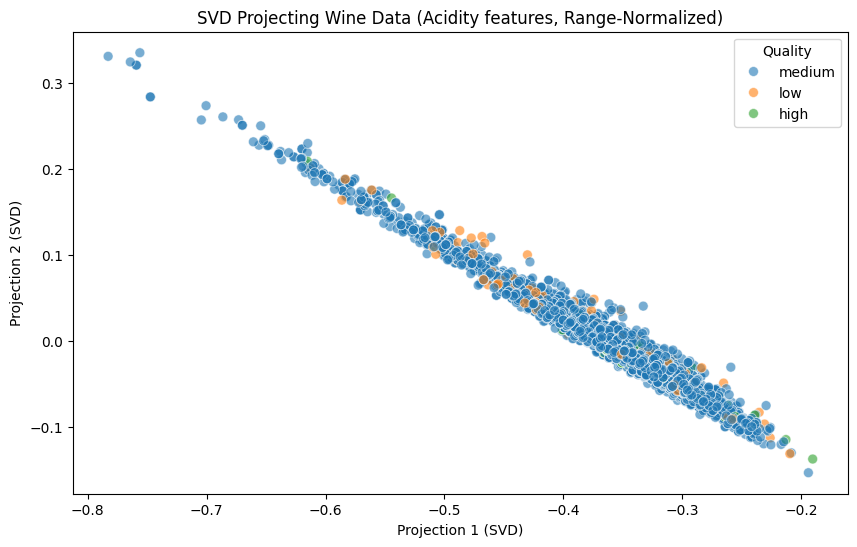

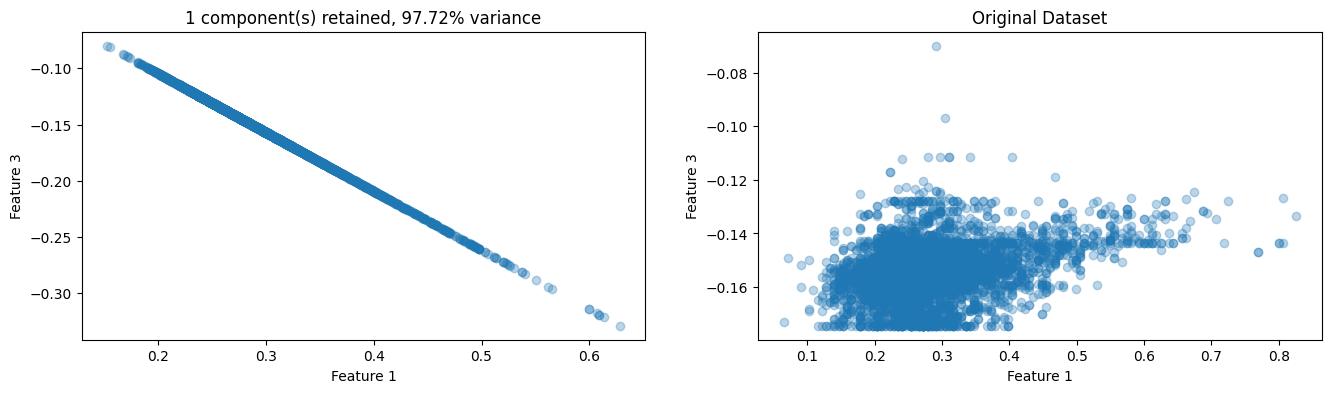

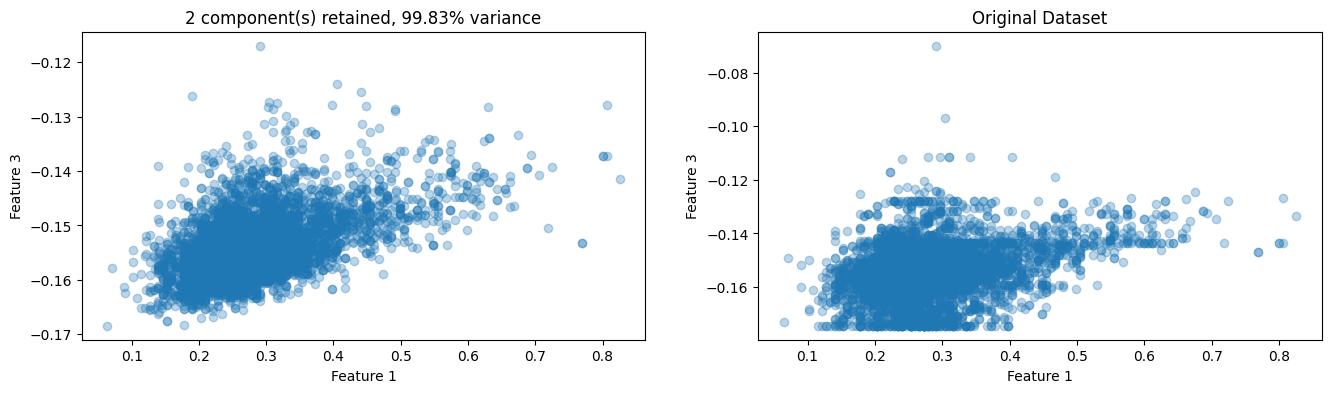

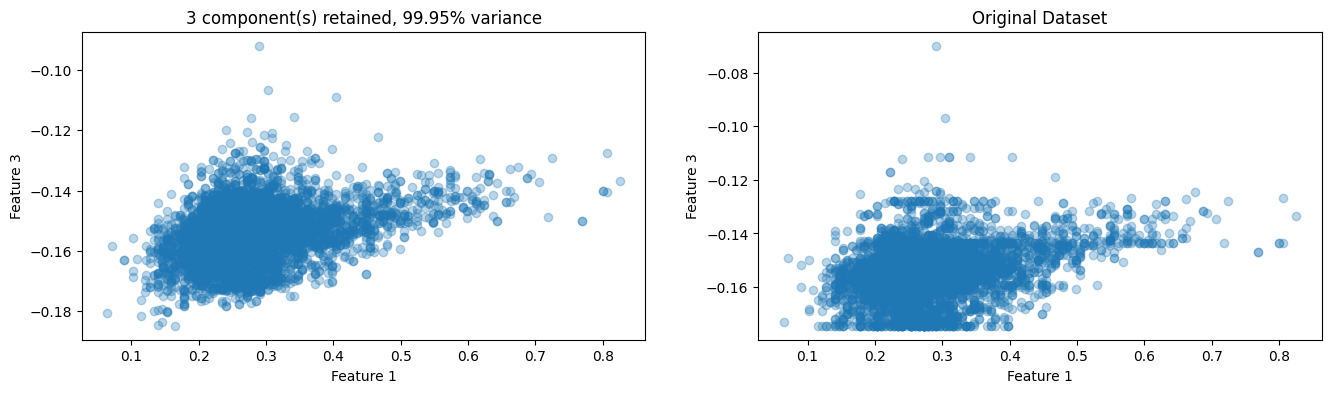

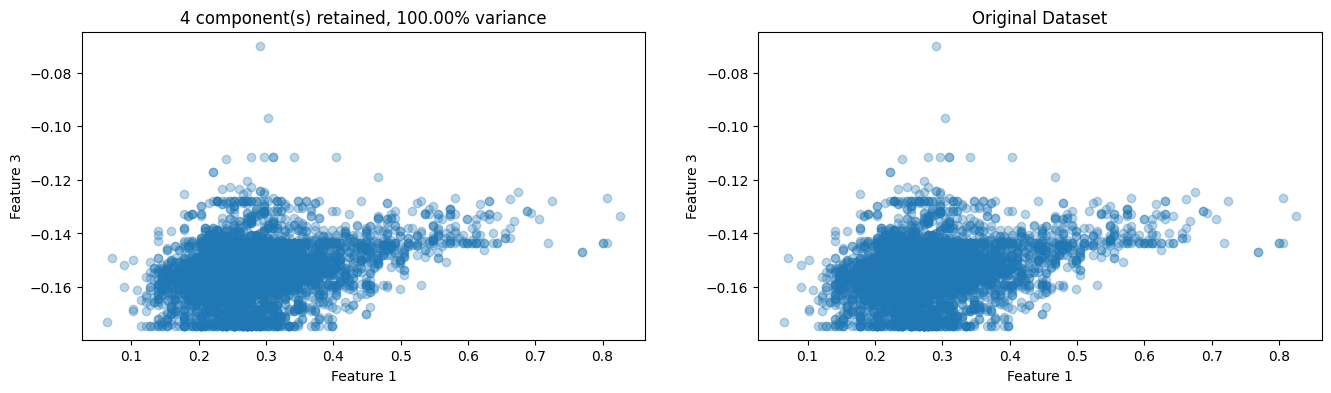

In [4]:
# perform range normalization
xmin, xmax = np.min(x_values), np.max(x_values) # get max and min from input array
x_norm = (x_values - np.mean(x_values))/(xmax - xmin) 
# plot SVD
plot_svd_projection(x_norm, x_values, y_values, fuzzy_membership=y_values, norm = "range", 
                    title='SVD Projecting Wine Data (Acidity features, Range-Normalized)')

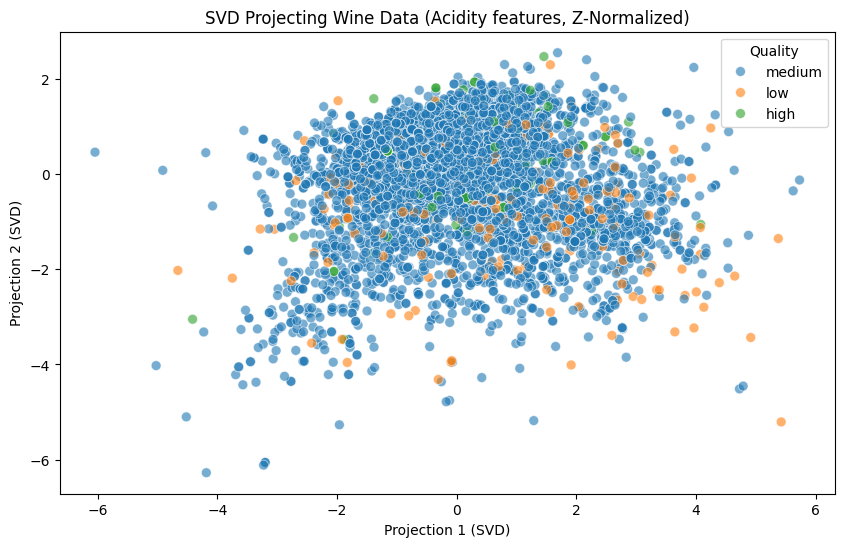

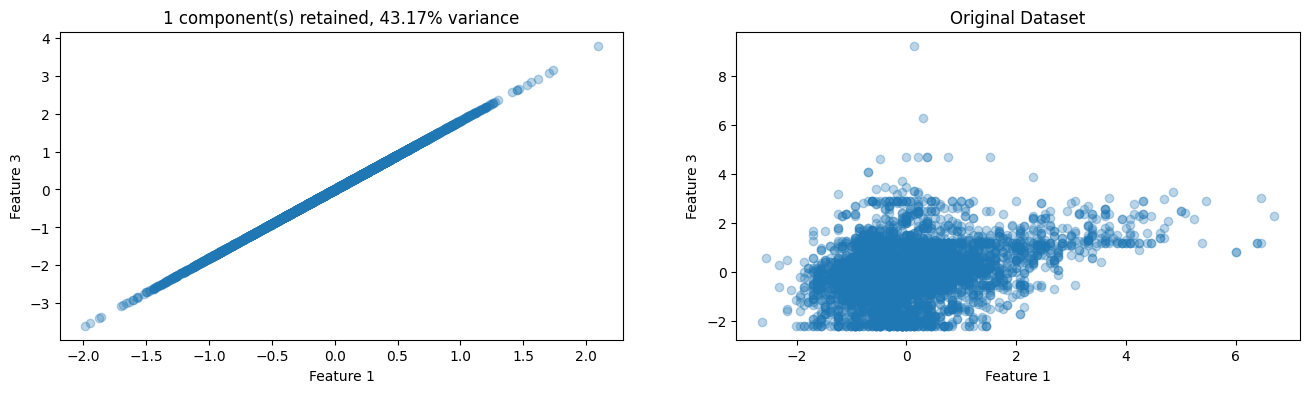

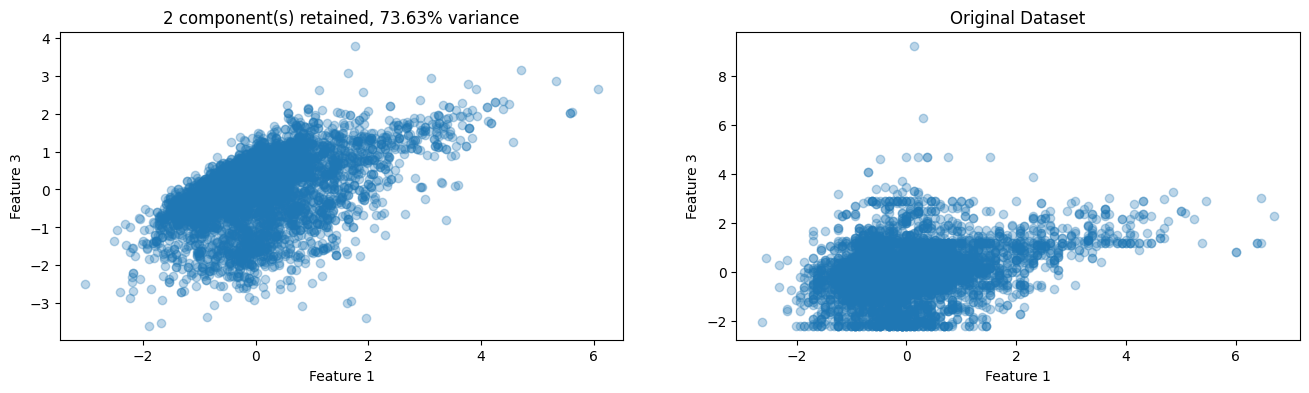

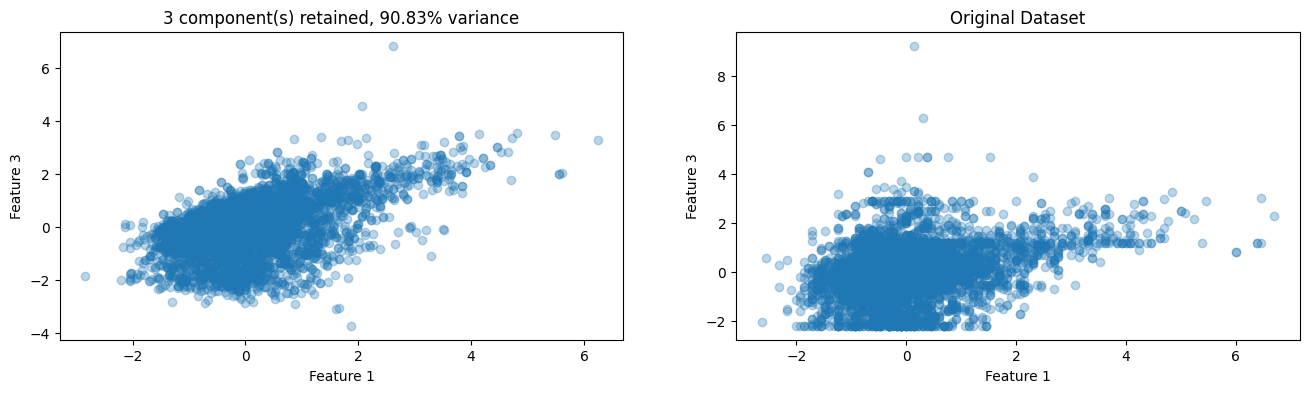

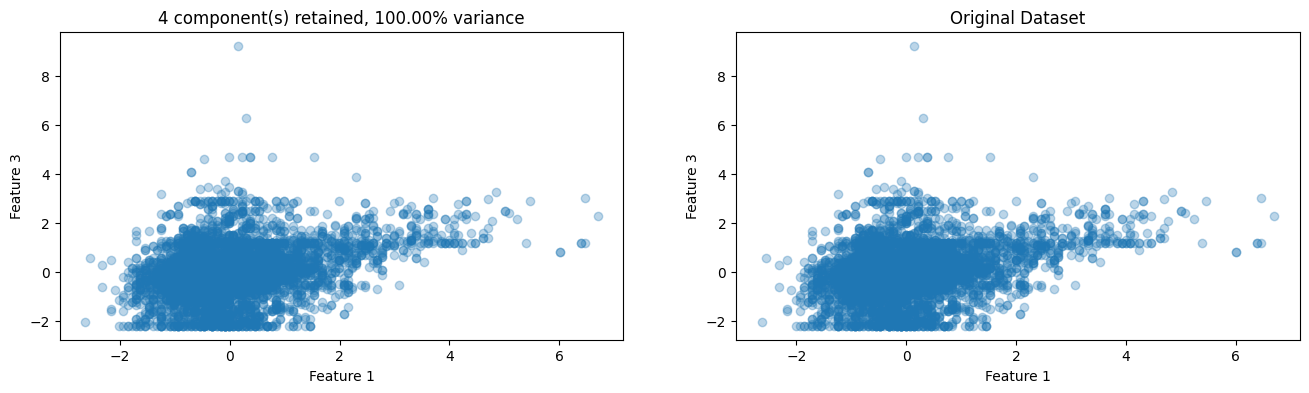

In [5]:
# perform z-score normalization
x_norm = StandardScaler().fit_transform(x_values) # z-score normalization
# plot SVD
plot_svd_projection(x_norm, x_values, y_values, fuzzy_membership=y_values, norm = "z", 
                    title='SVD Projecting Wine Data (Acidity features, Z-Normalized)')

In [6]:
# selecting features about fermentation
features = ["residual sugar", "alcohol", "volatile acidity", "density"]
# separating features and target
x_values = data[features].values

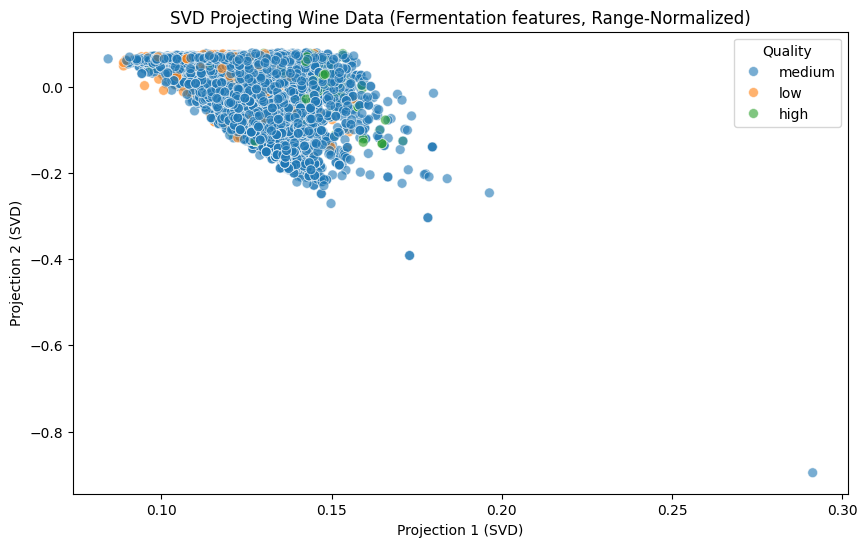

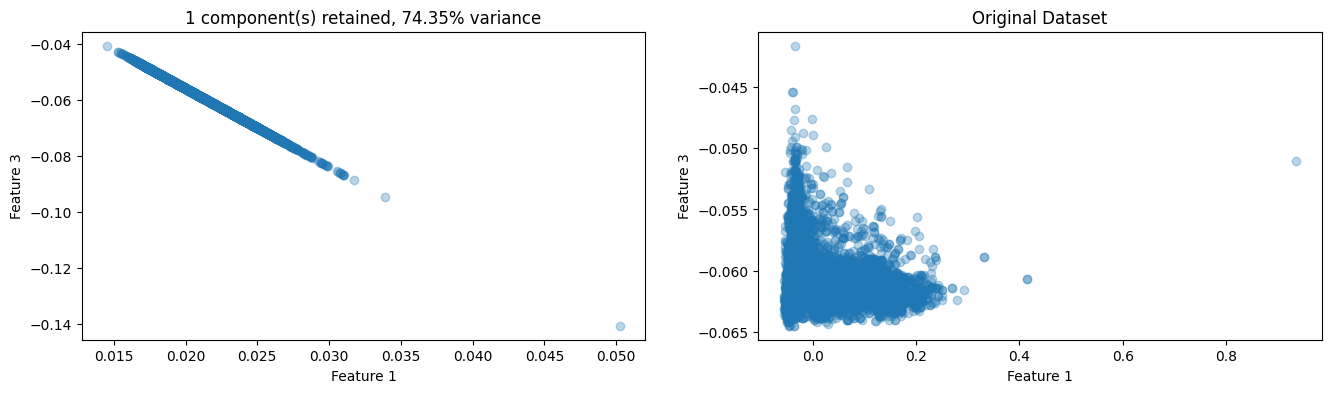

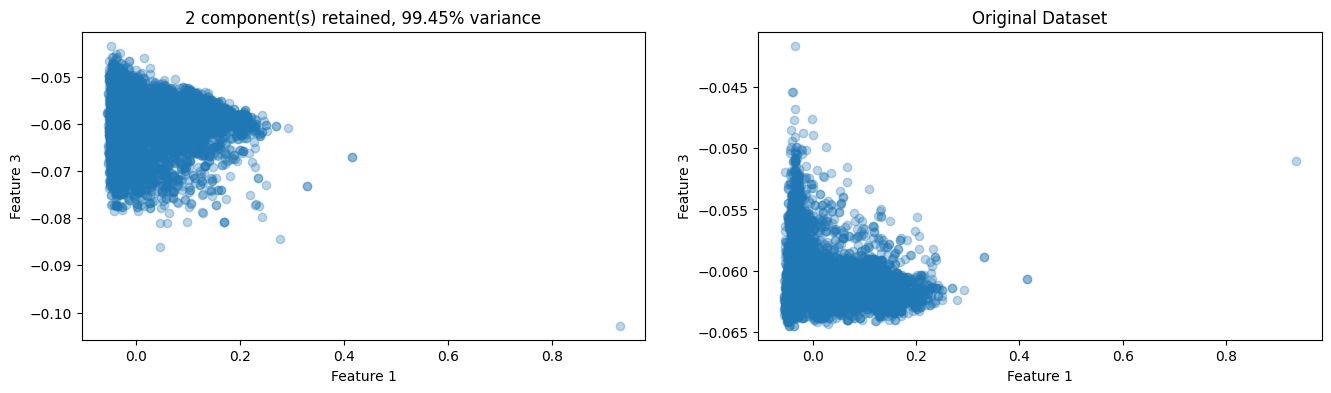

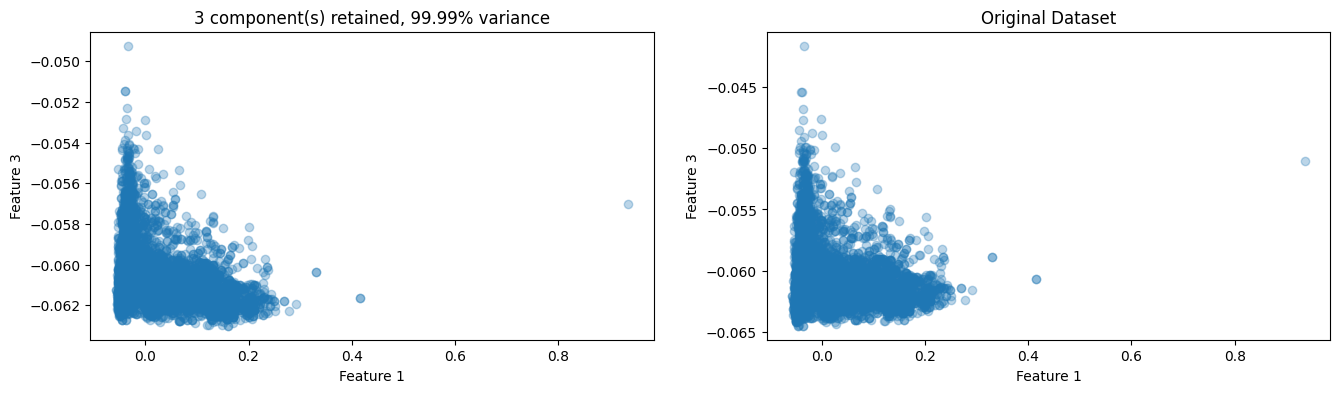

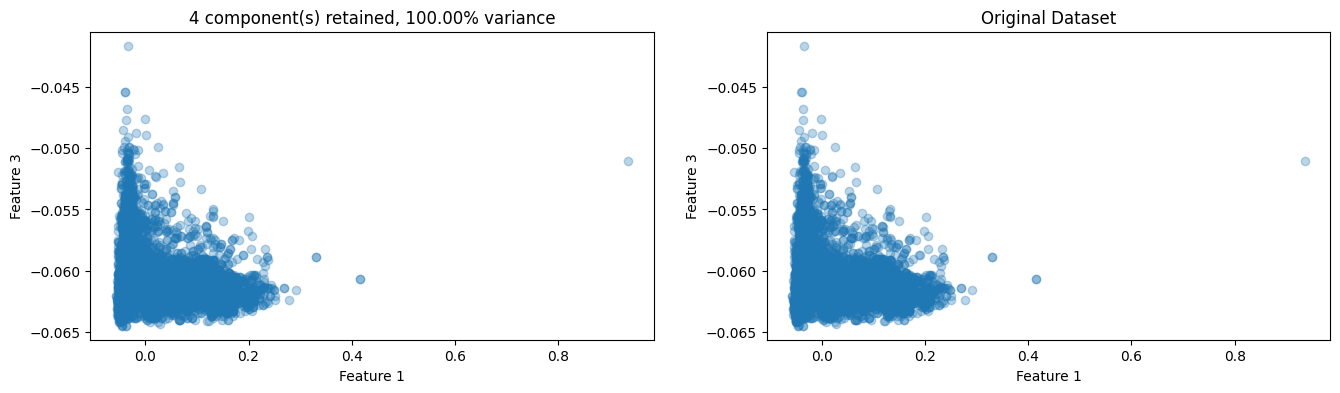

In [7]:
# perform range normalization
xmin, xmax = np.min(x_values), np.max(x_values) # get max and min from input array
x_norm = (x_values - np.mean(x_values))/(xmax - xmin) # scale between zero and one
# plot SVD
plot_svd_projection(x_norm, x_values, y_values, fuzzy_membership=y_values, norm = "range", 
                    title='SVD Projecting Wine Data (Fermentation features, Range-Normalized)')

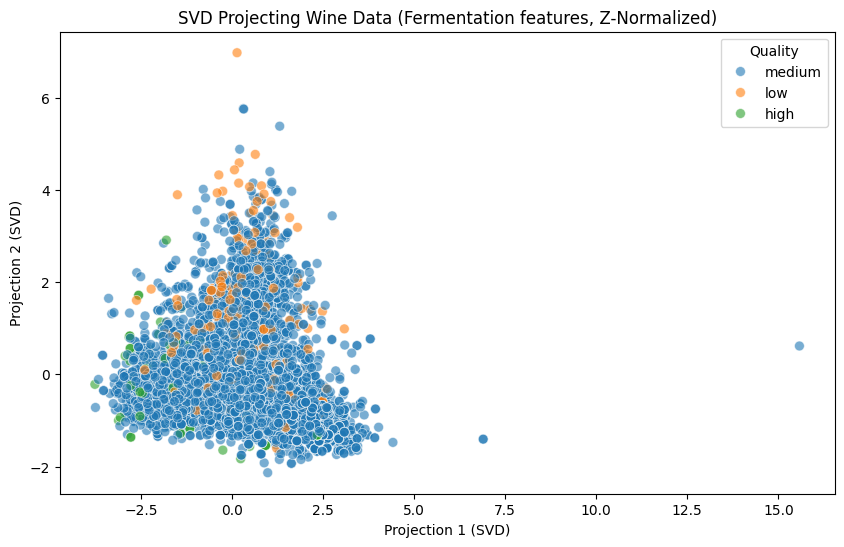

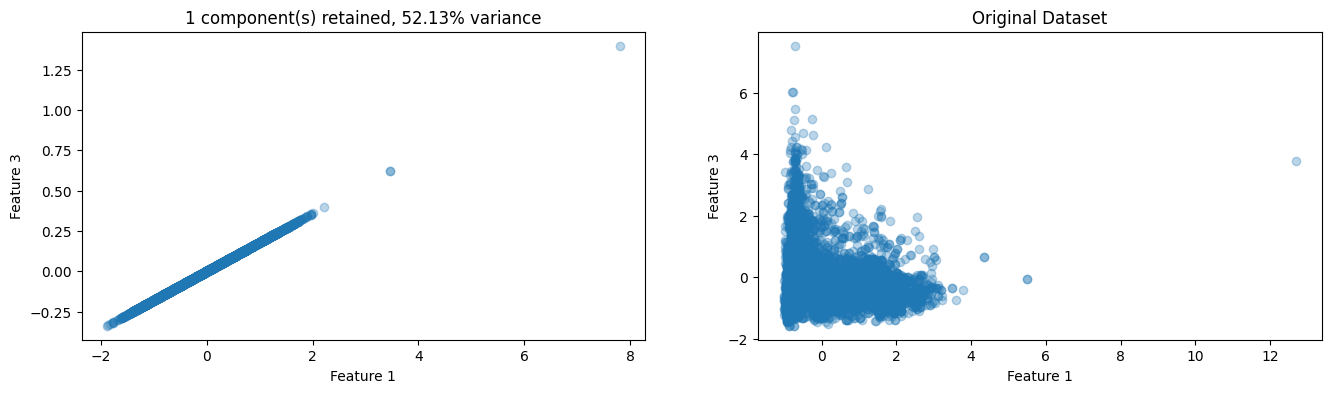

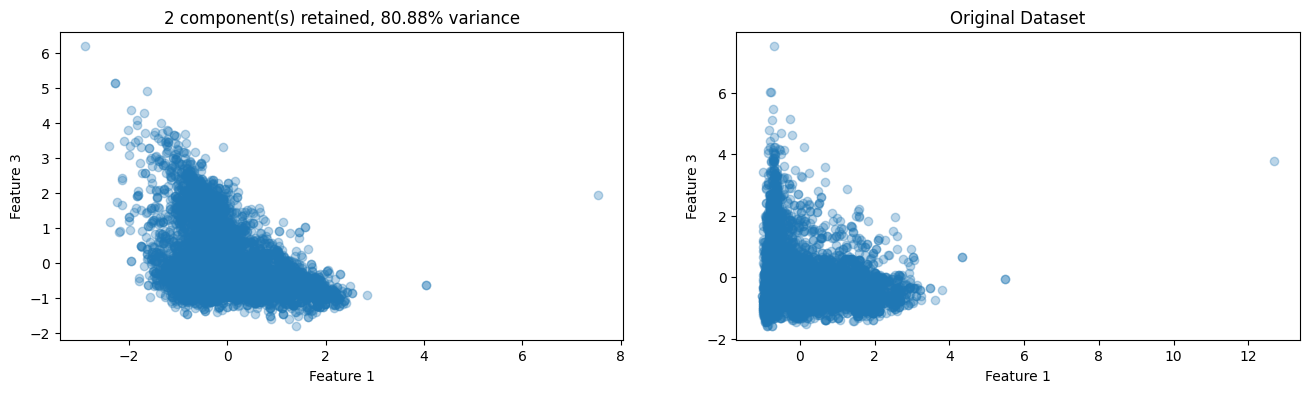

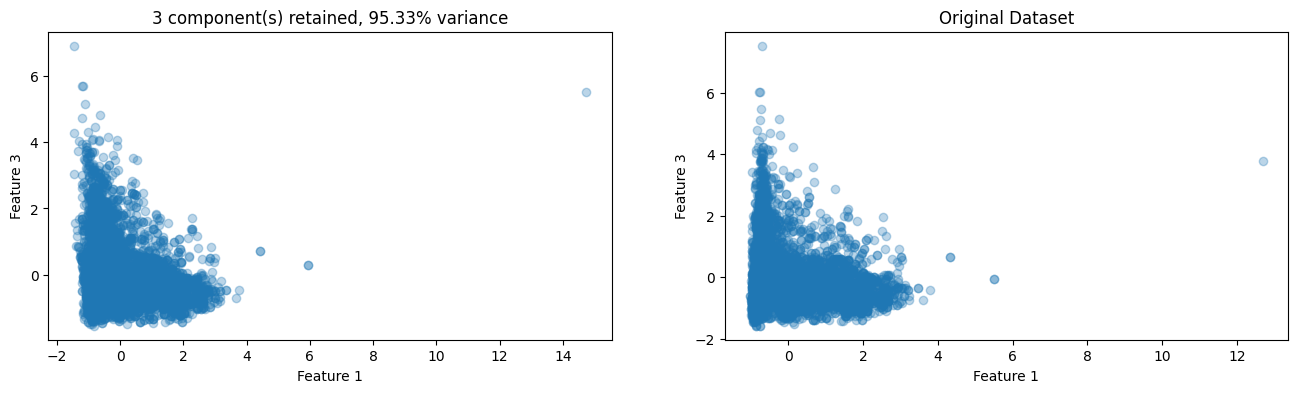

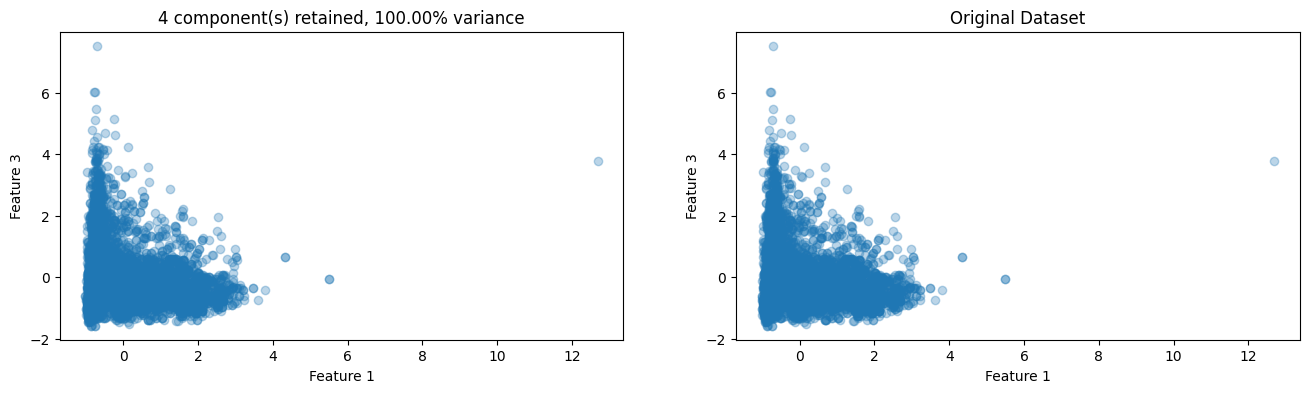

In [8]:
# perform z-score normalization
x_norm = (x_values - np.mean(x_values, axis=0)) / np.std(x_values, axis=0)
# plot SVD
plot_svd_projection(x_norm, x_values, y_values, fuzzy_membership=y_values, norm = "z",
                     title='SVD Projecting Wine Data (Fermentation features, Z-Normalized)')